<h1 align="center">Volume 4: Spectral 1.</h1>

    NAME: Quin Daly
    Section #?
    DATE: 01/19/21

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import barycentric_interpolate
from numpy import linalg as la
from scipy.optimize import root
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# Setup

In [2]:
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

# Problem 1

Use the differentiation matrix to numerically approximate the derivative of u(x)) on a grid of N Chebychev points where N = 6, 8, and 10.
Then use barycentric interpolation (scipy.interpolate.barycentric_interpolate) to
approximate u0 on a grid of 100 evenly spaced points.
Graphically compare your approximation to the exact derivative

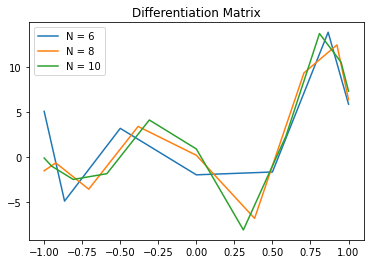

In [21]:
# Initialize
N = [6,8,10]
u = lambda x: np.exp(x)*np.cos(6*x)
exact_du = lambda x: np.exp(x)*np.cos(6*x) - 6*np.exp(x)*np.sin(6*x)

for n in N:
    # Find differentiation matrix, find derivative
    D, x = cheb(n)
    du = D@u(x)
    
    # Plot the derivative at the chebyshev points x
    plt.plot(x, du, label='N = ' + str(n))
    plt.legend()
    plt.title('Differentiation Matrix')
plt.show()
    
# Use Barycentric interpolation and compare it to the actual derivative
domain = np.linspace(-1,1,100)
barycentric = barycentric_interpolate(x, du, domain)
plt.plot(domain, barycentric, label='Barycentric')
plt.plot(domain, exact_du(domain), label='Analytic Solution')
plt.legend()
plt.title('Barycentric Interpolation')
plt.show()

# Problem 2

Use the pseudospectral method to solve the boundary value problem.
Use N = 8 in the cheb(N) method and use barycentric interpolation to approximate u on
100 evenly spaced points. Compare your numerical solution with the exact solution.

In [24]:
# Initialize
N = 8
f = lambda x: np.exp(2*x)
D, x = cheb(N)
F = f(x)
D2 = np.dot(D, D)
D2[0,:], D2[-1,:] = 0, 0
D2[0,0], D2[-1,-1] = 1, 1
F[0], F[-1] = 0, 0

# Solve using pseudospectral method
U = la.inv(D2) @ F
domain = np.linspace(min(x), max(x), 100)
barycentric = barycentric_interpolate(x, U, domain)

# Set up real solution
real = lambda x: (-1*np.cosh(2) - np.sinh(2)*x + np.exp(2*x)) / 4

# Plot the approx and real solution
plt.plot(domain, barycentric, label='Approximation')
plt.plot(domain, real(domain), label='Actual Solution')
plt.legend()
plt.plot()

[]

# Problem 3

Use the pseudospectral method to solve the boundary value problem.
Use N = 8 in the cheb(N) method and use barycentric interpolation to approximate u on
100 evenly spaced points.

In [49]:
# Initialize
N = 8
f = lambda x: np.exp(3*x)
D, x = cheb(N)
F = f(x)
D2 = np.dot(D, D)
D2 = D2 + D
D2[0,:], D2[-1,:] = 12, -4
D2[0,0], D2[-1,-1] = 1, 1
F[0], F[-1] = -4, 12

# Solve using pseudospectral method
U = la.inv(D2) @ F
domain = np.linspace(min(x), max(x), 100)
barycentric = barycentric_interpolate(x, U, domain)

# Plot the approx and real solution
plt.plot(domain, barycentric)
plt.title('Approximate Solution to U')
plt.plot()

[]

# Problem 4

Use the pseudospectral method to solve the boundary value problem
for several values of λ: λ = 4, 8, 12. Begin by transforming this BVP onto the domain −1 <
x < 1. Use N = 20 in the cheb(N) method and use barycentric interpolation to approximate
u on 100 evenly spaced points

In [114]:
# Initialize
N = 20
lam = [4,8,12]
D, x = cheb(20)
sols = []
for lam in lam:
    # Newton's method:
    def F(U):
        U[0] = 0
        U[-1] = 1
        out = (lam/4) * np.sinh(lam*U)  #Set up the equation you want the root of.
        
        bary = barycentric_interpolate(x, out, np.linspace(-1,1,N+1))
        return out  #Newtons Method will update U until the output is all 0's.
                              
    guess = (0.25)*np.ones(len(x))
    solution = root(F, guess).x
    b = barycentric_interpolate(x, solution, np.linspace(-1,1,100))
    sols.append(solution)

    # Plot the solutions for different lambda values
    plt.plot(np.linspace(1,0,100), b, label='$\u03BB=$' + str(lam))
    plt.legend()
    plt.title('Problem 4')
plt.show()
    
    
    

# Problem 5

Find the function y(x) that satisies y(−1) = 1, y(1) = 7, and whose surface of
revolution (about the x-axis) minimizes surface area. Compute the surface area, and plot the
surface. Use N = 50 in the cheb(N) method and use barycentric interpolation to approximate
u on 100 evenly spaced points.
Below is sample code for creating the 3D wireframe figure.

In [109]:
# Initialize
N = 50
D, x = cheb(N)
# Newton's method:
def F(U):
    U[0] = 1
    U[-1] = 7
    out = (D@D)@U - (D@U)@(D@U)  #Set up the equation you want the root of.

    bary = barycentric_interpolate(x, out, np.linspace(-1,1,N+1))
    return out  #Newtons Method will update U until the output is all 0's.

guess = (0.25)*np.ones(len(x))
solution = root(F, guess).x
barycentric = barycentric_interpolate(x, solution, np.linspace(-1,1,100))

lin = np.linspace(-1, 1, 100)
theta = np.linspace(0,2*np.pi,401)
X, T = np.meshgrid(lin, theta)
Y, Z = barycentric*np.cos(T), barycentric*np.sin(T)
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.show()

/Users/quindaly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
